In [1]:
import pandas as pd

df = pd.read_csv('https://www.fdsp.net/data/covid-merged.csv')
df.set_index('state', inplace=True)
df['cases_norm'] = df['cases'] / df['population'] * 1000

In [2]:
df['gdp_norm'] = df['gdp'] / df['population'] * 1000

In [3]:
m_gdp = df['gdp_norm'].median()
m_gdp

np.float64(61.04737129841516)

In [4]:
higher_gdp = df.query('gdp_norm > @m_gdp')
higher_gdp.head(3)

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616


In [5]:
lower_gdp = df.query('gdp_norm <= @m_gdp')
lower_gdp.head(3)

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042


In [6]:
len(higher_gdp), len(lower_gdp)

(25, 25)

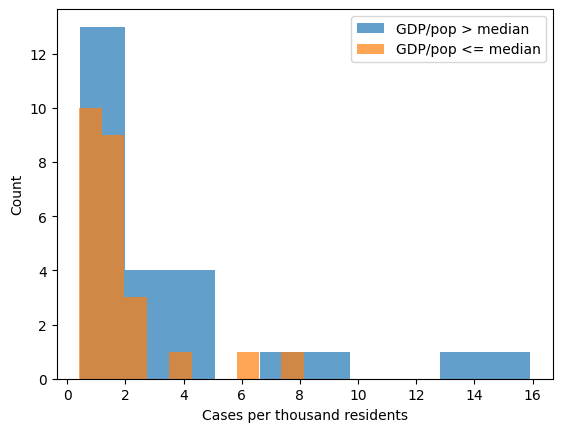

In [7]:
from matplotlib import pyplot as plt

plt.hist(higher_gdp['cases_norm'], alpha=0.7, label='GDP/pop > median')
plt.hist(lower_gdp['cases_norm'], alpha=0.7, label='GDP/pop <= median')
plt.legend()
plt.xlabel('Cases per thousand residents')
plt.ylabel('Count');

In [8]:
import numpy as np

mybins = np.arange(0, 18, 2)
mybins

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

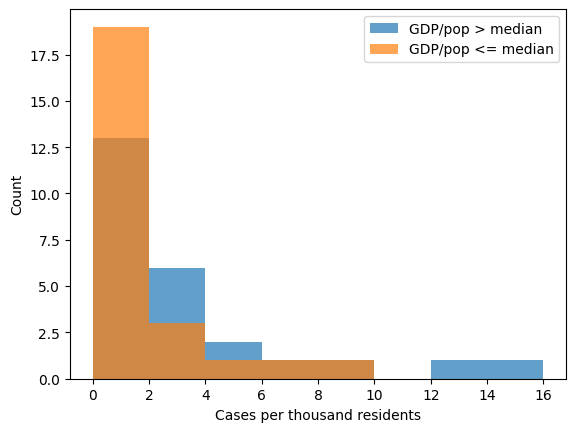

In [9]:
plt.hist(higher_gdp['cases_norm'], alpha=0.7, label='GDP/pop > median', bins=mybins)
plt.hist(lower_gdp['cases_norm'], alpha=0.7, label='GDP/pop <= median', bins=mybins)
plt.legend()
plt.xlabel('Cases per thousand residents')
plt.ylabel('Count');

In [10]:
hgdp_mu = higher_gdp['cases_norm'].mean()
lgdp_mu = lower_gdp['cases_norm'].mean()
hgdp_mu, lgdp_mu

(np.float64(3.511241636831491), np.float64(1.9258062634390531))

In [11]:
higher_gdp['cases_norm'].median(), lower_gdp['cases_norm'].median()

(np.float64(1.9453983135416348), np.float64(1.3878449780364717))

In [13]:
m_urban = df['urban'].median()
m_urban

np.float64(73.735)

In [14]:
higher_urban = df.query('urban > @m_urban')
lower_urban = df.query('urban <= @m_urban')
len(higher_urban), len(lower_urban)

(25, 25)

In [15]:
higher_urban["cases_norm"].mean(), lower_urban["cases_norm"].mean()

(np.float64(3.8908749904320756), np.float64(1.5461729098384682))